In [1]:
import os
import urllib.request
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
if not os.path.exists('Data'):
    !mkdir Data
    print('creating folder "Data"')
if not os.path.exists('Data/NYCHA'):
    !mkdir Data\NYCHA
    print('creating folder "Data/NYCHA"')

In [3]:
# Download Map of NYCHA Developments, shapefile
if not os.path.exists('Data/NYCHA/Map_of_NYCHA_Developments.zip'):
    NYCHA_map_shape_url = 'https://data.cityofnewyork.us/api/geospatial/i9rv-hdr5?method=export&format=Shapefile'
    urllib.request.urlretrieve(NYCHA_map_shape_url,'Data/NYCHA/Map_of_NYCHA_Developments.zip')
    print('done')

In [4]:
# Download NYCHA_Development_Data_Book.csv
if not os.path.exists('Data/NYCHA/NYCHA_Development_Data_Book.csv'):
    NYCHA_Development_url = 'https://data.cityofnewyork.us/api/views/evjd-dqpz/rows.csv?accessType=DOWNLOAD'
    urllib.request.urlretrieve(NYCHA_Development_url,'Data/NYCHA/NYCHA_Development_Data_Book.csv')
    print('done')

In [5]:
import zipfile
with zipfile.ZipFile('Data/NYCHA/Map_of_NYCHA_Developments.zip', 'r') as zip_ref:
    zip_ref.extractall('Data/NYCHA/Map_of_NYCHA_Developments')

In [6]:
shapefile = os.listdir('Data/NYCHA/Map_of_NYCHA_Developments')[2]
dev_geo = gpd.read_file('Data/NYCHA/Map_of_NYCHA_Developments/' + shapefile)
dev_geo.tds_num = pd.to_numeric(dev_geo.tds_num, errors='coerce')
dev_geo.shape

(302, 4)

In [7]:
dev_geo.head()

,borough,developmen,tds_num,geometry
0,BRONX,1010 EAST 178TH STREET,180,"POLYGON ((-73.88092 40.84050, -73.88068 40.840..."
1,BROOKLYN,104-14 TAPSCOTT STREET,242,"POLYGON ((-73.92039 40.66498, -73.92074 40.664..."
2,BRONX,1162-1176 WASHINGTON AVENUE,233,"POLYGON ((-73.90694 40.83009, -73.90705 40.829..."
3,MANHATTAN,131 SAINT NICHOLAS AVENUE,154,"POLYGON ((-73.95286 40.80376, -73.95317 40.803..."
4,BRONX,1471 WATSON AVENUE,214,"POLYGON ((-73.88106 40.82640, -73.88099 40.826..."


In [8]:
dev_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

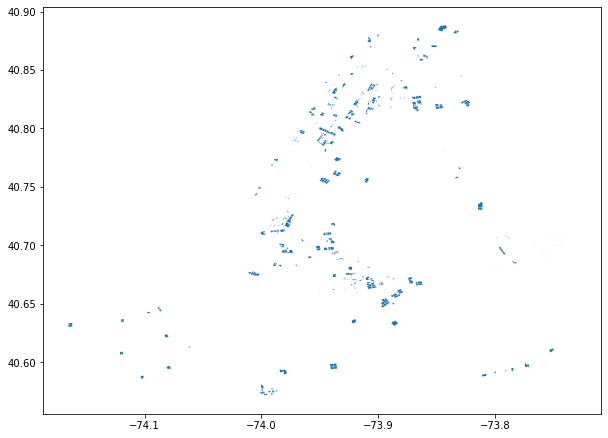

In [9]:
dev_geo.plot(figsize=(10,10),aspect='equal')

In [10]:
developments = pd.read_csv('Data/NYCHA/NYCHA_Development_Data_Book.csv')
developments.columns = [col.replace('#','') for col in developments.columns]
developments['TDS'] = pd.to_numeric(developments['TDS'], errors='coerce')
developments.shape

(323, 51)

In [11]:
developments.dropna(subset=['TDS'],inplace=True)
developments['TDS'] = developments['TDS'].apply(int)
developments.shape

(319, 51)

In [12]:
developments.head()

,DATA AS OF,DEVELOPMENT,HUD AMP,TDS,CONSOLIDATED TDS,DEVELOPMENT EDP,OPERATING EDP,HUD,PROGRAM,METHOD,...,COMMUNITY DISTIRCT,US CONGRESSIONAL DISTRICT,NY STATE SENATE DISTRICT,NY STATE ASSEMBLY DISTRICT,NY CITY COUNCIL DISTRICT,COMPLETION DATE,FEDERALIZED DEVELOPMENT,SENIOR DEVELOPMENT,ELECTRICITY PAID BY RESIDENTS,PRIVATE MANAGEMENT
0,1/1/2019,1010 EAST 178TH STREET,NY005011330,180,180,289,289,NY005090,FEDERAL,CONVENTIONAL,...,6,15,32,87,15,3/31/1971,NaN,NaN,NaN,NaN
1,1/1/2019,104-14 TAPSCOTT STREET,NY005011670,242,167,361,283,NY005174,FEDERAL,TURNKEY,...,16,9,20,55,41,10/31/1972,NaN,NaN,NaN,NaN
2,1/1/2019,1162-1176 WASHINGTON AVENUE,NY005013080,233,308,354,344,NY005138,FEDERAL,TURNKEY,...,3,15,32,79,16,12/31/1975,NaN,NaN,NaN,NaN
3,1/1/2019,131 SAINT NICHOLAS AVENUE,NY005010970,154,097,264,261,NY005065,FEDERAL,CONVENTIONAL,...,10,13,30,70,09,3/31/1965,NaN,NaN,NaN,NaN
4,1/1/2019,1471 WATSON AVENUE,NY005010670,214,067,332,222,NY005162,FEDERAL,TURNKEY,...,9,15,32,85,17,12/31/1970,NaN,NaN,NaN,NaN


In [13]:
developments_geo = developments.merge(dev_geo, left_on='TDS', right_on='tds_num')
developments_geo = gpd.GeoDataFrame(developments_geo)
developments_geo.shape

(302, 55)

<AxesSubplot:>

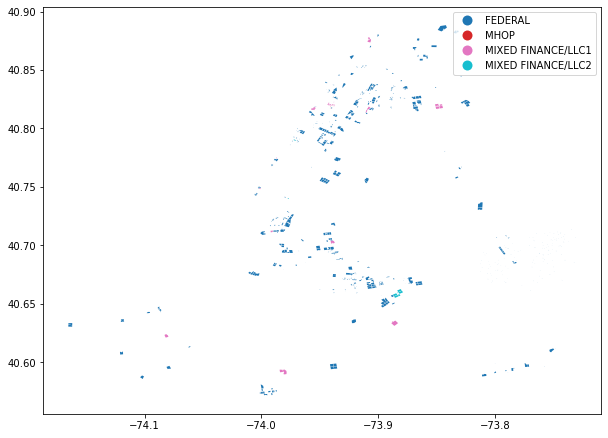

In [14]:
developments_geo.plot(figsize=(10,10),aspect='equal',column='PROGRAM',legend=True)